<a href="https://colab.research.google.com/github/mars241/Machine-Learning/blob/main/Solutions_2_2_ML_Classifications_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below
You will get a passenger list of the titanic.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/titanic.csv"
df_titanic = pd.read_csv(link)
df_titanic['Survived'] = df_titanic['Survived'].apply(lambda x: "Survived" if x == 1 else "Dead")
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,Dead,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,Survived,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,Dead,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


# Data preparation

What are the "type" of each column? Are there non-numeric columns?

In [ ]:
# What are the "type" of each column?
df_titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    object 
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 55.6+ KB


In [ ]:
df_titanic['Survived'].value_counts(dropna=False)

Dead        545
Survived    342
Name: Survived, dtype: int64

In [ ]:
df_titanic['Survived_facto'] = df_titanic['Survived'].factorize()[0]
df_titanic['Survived_facto'].value_counts()

0    545
1    342
Name: Survived_facto, dtype: int64

In [ ]:
df_titanic['Sex'].value_counts(dropna=False)

male      573
female    314
Name: Sex, dtype: int64

In [ ]:
df_titanic['Sex_facto'] = df_titanic['Sex'].factorize()[0]
df_titanic['Sex_facto'].value_counts()

0    573
1    314
Name: Sex_facto, dtype: int64

In [ ]:
df_titanic['Pclass'].value_counts(dropna=False)

3    487
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
df_titanic['Pclass'] = pd.to_numeric(df_titanic['Pclass'])

In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    object 
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
 8   Sex_facto                887 non-null    int64  
 9   Survived_facto           887 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 69.4+ KB


In [ ]:
df_titanic.isna().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
Sex_facto                  0
Survived_facto             0
dtype: int64

In [ ]:
df_titanic.drop_duplicates().shape

(887, 10)

In [ ]:
df_titanic.shape

(887, 10)

Then, make a first exploration (pairplots, correlation heatmaps, etc...) of the dataset

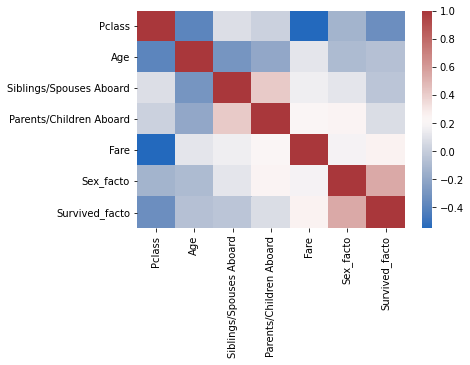

In [ ]:
# First exploration:
import seaborn as sns
import matplotlib.pyplot as plt

titanic = df_titanic.drop(columns = ['Survived', 'Name', 'Sex'])

corr_titanic = titanic.corr()
sns.heatmap(corr_titanic, cmap='vlag')

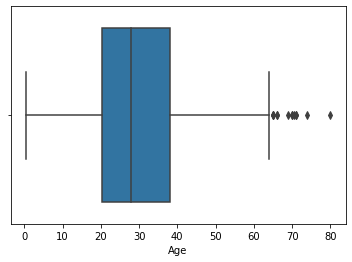

In [ ]:
sns.boxplot(data=df_titanic, x='Age')

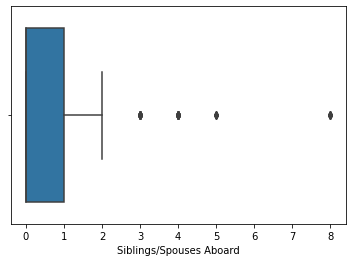

In [ ]:
sns.boxplot(data=df_titanic, x='Siblings/Spouses Aboard')

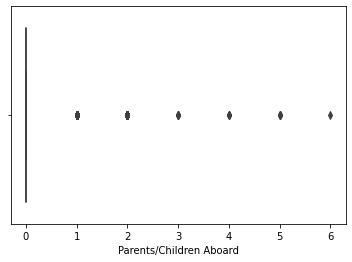

In [ ]:
sns.boxplot(data=df_titanic, x='Parents/Children Aboard')

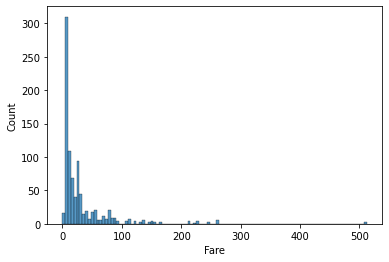

In [ ]:
sns.histplot(data=df_titanic, x='Fare')

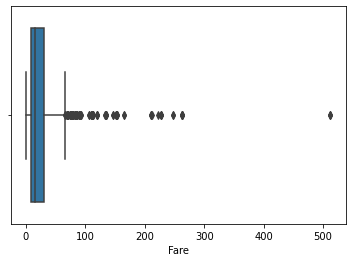

In [ ]:
sns.boxplot(data=df_titanic, x='Fare')

In [ ]:
df_titanic.loc[df_titanic['Fare'] > 300]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_facto,Survived_facto
257,Survived,1,Miss. Anna Ward,female,35.0,0,0,512.3292,1,1
676,Survived,1,Mr. Thomas Drake Martinez Cardeza,male,36.0,0,1,512.3292,0,1
733,Survived,1,Mr. Gustave J Lesurer,male,35.0,0,0,512.3292,0,1


You are looking for Jack. How many people named Jack on board?

In [ ]:
# How many people named Jack on board?
df_titanic[df_titanic['Name'].str.contains('Jack')]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_facto,Survived_facto
762,Dead,1,Dr. Arthur Jackson Brewe,male,46.0,0,0,39.6,0,0


# Logistic regression

Today, in this quest, you have an extraordinary power: you can travel in time to try to save some passengers.
You obviously wanted to save Jack. But you didn't find his name on the list. He probably travels under a false name...
Too bad, thanks to this trip, you will still try to save as many people as possible. To do this, you have to identify the people who are most probably going to die.

- Select features (X) with only numeric values, and without "Survived" column
- Select "Survived" column as target (y)
- Split your data with **random_state = 36**
- Train a logistic regression
- Print the accuracy score on the train set and on the test set. Is there overfitting?
- Print the Confusion Matrix on the test set
- How many iterations were needed to train this model?

In [ ]:
# It's up to you:

X = titanic.drop(columns='Survived_facto')
y = df_titanic['Survived']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 36, train_size= 0.7)

In [ ]:
log_model = LogisticRegression().fit(X_train, y_train)

In [ ]:
print('accuracy score on train set :',log_model.score(X_train, y_train))
print('accuracy score on test set :',log_model.score(X_test, y_test))

accuracy score on train set : 0.8112903225806452
accuracy score on test set : 0.8014981273408239


--> modèle bien ajusté

In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = log_model.predict(X_test)),
             index = log_model.classes_ + " ACTUAL",
             columns = log_model.classes_ + " PREDICTED")

,Dead PREDICTED,Survived PREDICTED
Dead ACTUAL,138,23
Survived ACTUAL,30,76


In [ ]:
log_model
#--> par défaut : 100 itérations (paramètre 'max_iter')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Model improvement

With your fancy time machine, you can, and you will save all the people that the model will predict as dead. But you won't save people predicted as "survived" (because it's not necessary). So change the weights of the classes to be very careful: your goal is to save all the people at risk. So, in this case, it's better to have "actual survived" peopple predicted as death, because you'll save them anyway. Otherwise, "actual death" predicted as survived won't be saved by your time machine.
- Change the weight of the classes
- Fit the model on train set
- Print the accuracy score on the train set and on the test set
- Print the Confusion Matrix on the test set, you must have no deaths that have been predicted as "Survived".

In [ ]:
# It's up to you to save everybody:
log_model_2 = LogisticRegression(class_weight={'Dead':10})
log_model_2.fit(X_train, y_train)

In [ ]:
print('accuracy score on train set :',log_model_2.score(X_train, y_train))
print('accuracy score on test set :',log_model_2.score(X_test, y_test))

accuracy score on train set : 0.7161290322580646
accuracy score on test set : 0.6741573033707865


In [ ]:
#Print the Confusion Matrix on the test set, you must have no deaths that have been predicted as "Survived".
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = log_model_2.predict(X_test)),
             index = log_model_2.classes_ + " ACTUAL",
             columns = log_model_2.classes_ + " PREDICTED")

,Dead PREDICTED,Survived PREDICTED
Dead ACTUAL,161,0
Survived ACTUAL,87,19


# People most at risk

You are looking for people most at risk.
- Compute the prediction probabilities **on your test set**
- Which column is about "survived" probability?
- Among the previous prediction probability array, select only the column corresponding to the "Survived" probability
- Display the passengers by sorting  most likely to survive first (`sorted_values()` method?)

In [ ]:
# It's up to you:
#X_test['predictions'] = log_model.predict(X_test)

In [ ]:
X_test_proba = log_model.predict_proba(X_test)
X_test_proba

In [ ]:
#Among the previous prediction probability array, select only the column corresponding to the "Survived" probability
X_test['proba_survive'] = X_test_proba[:,1:]

In [ ]:
#Display the passengers by sorting most likely to survive first (sorted_values() method?)
X_test['proba_survive'].sort_values(ascending=False)

883    0.966203
135    0.963077
777    0.957776
289    0.956771
309    0.955545
         ...   
628    0.032268
278    0.015845
508    0.015062
535    0.013104
322    0.007306
Name: proba_survive, Length: 267, dtype: float64

In [ ]:
X_proba =log_model.predict_proba(X)
X['proba_survive'] = X_proba[:,1:]

In [ ]:
X.sort_values(by='proba_survive', ascending=False)

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_facto,proba_survive
295,1,2.0,1,2,151.5500,1,0.982731
686,1,15.0,0,1,211.3375,1,0.980994
257,1,35.0,0,0,512.3292,1,0.974579
501,1,16.0,0,0,86.5000,1,0.974455
327,1,16.0,0,1,57.9792,1,0.971619
...,...,...,...,...,...,...,...
115,3,70.5,0,0,7.7500,0,0.011943
847,3,74.0,0,0,7.7750,0,0.009972
200,3,17.0,8,2,69.5500,0,0.008532
842,3,18.0,8,2,69.5500,0,0.008102


# Bonus - Model improvement, under constraint

Your time travel boss tells you that there's a budget cut. You now can only save 120 people max. Not one more.

If your model predicts as "dead" someone who would have survived in reality. You then "save" that person, who would have survived even without your time-traveling help. And you take the place of someone who could have been saved. That's not optimal.

Select the 120 people with the highest probability of dying. Of these, how many actually survived?

In [ ]:
df_titanic_names = df_titanic['Name']

pandas.core.series.Series

In [ ]:
titanic_2 = X.join(df_titanic_names)
titanic_2

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_facto,proba_survive,Name
0,3,22.0,1,0,7.2500,0,0.092154,Mr. Owen Harris Braund
1,1,38.0,1,0,71.2833,1,0.887001,Mrs. John Bradley (Florence Briggs Thayer) Cum...
2,3,26.0,0,0,7.9250,1,0.614279,Miss. Laina Heikkinen
3,1,35.0,1,0,53.1000,1,0.897921,Mrs. Jacques Heath (Lily May Peel) Futrelle
4,3,35.0,0,0,8.0500,0,0.071451,Mr. William Henry Allen
...,...,...,...,...,...,...,...,...
882,2,27.0,0,0,13.0000,0,0.288956,Rev. Juozas Montvila
883,1,19.0,0,0,30.0000,1,0.966203,Miss. Margaret Edith Graham
884,3,7.0,1,2,23.4500,1,0.733058,Miss. Catherine Helen Johnston
885,1,26.0,0,0,30.0000,0,0.605158,Mr. Karl Howell Behr


In [ ]:
# It's up to you:
dead = titanic_2.sort_values(by='proba_survive', ascending = True).head(120)
print(dead['Name'])

322        Mr. George John Jr Sage
842        Mr. Douglas Bullen Sage
200             Mr. Frederick Sage
847             Mr. Johan Svensson
115            Mr. Patrick Connors
                  ...             
715    Mr. Malkolm Joackim Johnson
877              Mr. Johann Markun
129            Mr. Jozef Drazenoic
102      Mr. Gustaf Joel Johansson
283             Mr. Ivan Stankovic
Name: Name, Length: 120, dtype: object


# Bonus - More predictions

Does the Reverend "Rev. Juozas Montvila" have a better chance of survival than "Mrs. William (Margaret Norton) Rice"?
- Filter the initial DataFrame to get only the 2 rows with the 2 persons above, and only columns present in your variables (X)
- Make a prediction with probability for this 2 people
- Which one has a better chance to survive?


In [ ]:
bonus = titanic_2[(titanic_2['Name']=='Rev. Juozas Montvila') | (titanic_2['Name']=='Mrs. William (Margaret Norton) Rice')]
bonus_numeric = bonus.drop(columns=['Name', 'proba_survive'])
bonus_numeric

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_facto
881,3,39.0,0,5,29.125,1
882,2,27.0,0,0,13.000,0


In [ ]:
log_model.predict_proba(bonus_numeric)

array([[0.59151773, 0.40848227],
       [0.71104431, 0.28895569]])

In [ ]:
#--> Rev. Juozas Montvila a plus de chance de survivre que Mrs. William (Margaret Norton) Rice (0.41 vs 0.29)